<a href="https://colab.research.google.com/github/nadya-az/artificial_neural_networks/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%E2%84%964.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
import warnings
from pylab import rcParams
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

In [ ]:
def unpickle(file):
   import pickle
   with open(file, 'rb') as fo:
      dict = pickle.load(fo, encoding='bytes')
   return dict

Нормализуем данные

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar100.load_data()

169001437/169001437 [==============================] - 13s 0us/step


In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_train = x_train/ 255.0

In [ ]:
# x_train = np.expand_dims(x_train, axis=3)
# x_test = np.expand_dims(x_test, axis=3)

In [5]:
x_test = x_test/ 255.0

In [6]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

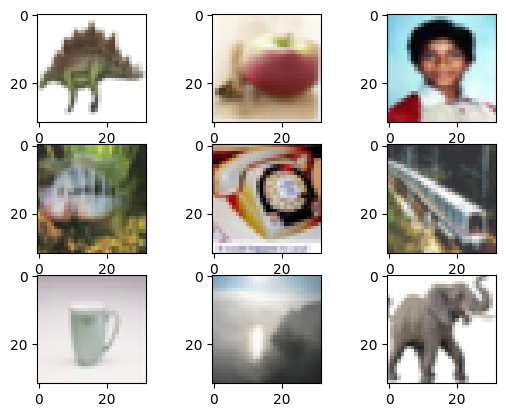

In [8]:
for i in range(1, 10):
    plt.subplot(3, 3, i)
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
 
plt.show()

In [21]:
model_1 = Sequential()
model_1.add(Conv2D(32, (3,3), activation="relu", padding='same'))
model_1.add(MaxPooling2D((2, 2)))
model_1.add(Conv2D(32, (3,3), activation="relu", padding='same'))
model_1.add(MaxPooling2D((2, 2)))
model_1.add(Conv2D(64, (3,3), activation="relu", padding='same'))
model_1.add(MaxPooling2D((2, 2)))


model_1.add(Flatten())
model_1.add(Dense(64, activation="relu"))
model_1.add(Dense(100, activation="softmax"))


In [22]:
model_1.compile(loss='categorical_crossentropy',
              optimizer = keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

In [23]:
batch_size = 64
epochs = 5
print(x_train.shape, y_train.shape)

(50000, 32, 32, 3) (50000, 100)


In [24]:
model_1_history = model_1.fit(x_train, y_train,
                              batch_size=batch_size,
                              epochs=epochs,
                              verbose=1,
                              validation_data=(x_test, y_test))

Epoch 1/5
782/782 [==============================] - 9s 8ms/step - loss: 4.0761 - accuracy: 0.0763 - val_loss: 3.6793 - val_accuracy: 0.1426
Epoch 2/5
782/782 [==============================] - 5s 6ms/step - loss: 3.4102 - accuracy: 0.1841 - val_loss: 3.1867 - val_accuracy: 0.2309
Epoch 3/5
782/782 [==============================] - 6s 7ms/step - loss: 3.0338 - accuracy: 0.2519 - val_loss: 2.9967 - val_accuracy: 0.2677
Epoch 4/5
782/782 [==============================] - 4s 6ms/step - loss: 2.8055 - accuracy: 0.2969 - val_loss: 2.8350 - val_accuracy: 0.2951
Epoch 5/5
782/782 [==============================] - 5s 6ms/step - loss: 2.6495 - accuracy: 0.3277 - val_loss: 2.7625 - val_accuracy: 0.3098


In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


c batchnormalization

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar100.load_data()

In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
x_test.shape

(10000, 32, 32, 3)

In [ ]:
x_train = x_train/ 255.0
x_test = x_test/ 255.0

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [26]:
model_2 = Sequential()
model_2.add(Conv2D(32, (3,3), activation="relu"))
model_2.add(MaxPooling2D((2, 2)))
model_2.add(Conv2D(64, (3,3), activation="relu"))
model_2.add(MaxPooling2D((2, 2)))
model_2.add(Conv2D(64, (3,3), activation="relu"))
model_2.add(Flatten())
model_2.add(Dense(64))
model_2.add(BatchNormalization())
model_2.add(Activation("relu"))
model_2.add(Dense(100))
model_2.add(BatchNormalization())
model_2.add(Activation("softmax"))

model_2.compile(loss='categorical_crossentropy',
              optimizer = keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

In [ ]:
model_2.compile(loss='categorical_crossentropy',
              optimizer = keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

In [27]:
batch_size = 64
epochs = 5

In [28]:
model_2_history = model_2.fit(x_train, y_train,
                              batch_size=batch_size,
                              epochs=epochs,
                              validation_data=(x_test, y_test),
                              shuffle=True)

Epoch 1/5
782/782 [==============================] - 10s 9ms/step - loss: 3.7985 - accuracy: 0.1406 - val_loss: 3.6774 - val_accuracy: 0.1406
Epoch 2/5
782/782 [==============================] - 6s 7ms/step - loss: 3.1873 - accuracy: 0.2481 - val_loss: 3.2798 - val_accuracy: 0.2243
Epoch 3/5
782/782 [==============================] - 7s 9ms/step - loss: 2.8731 - accuracy: 0.3004 - val_loss: 2.8924 - val_accuracy: 0.2923
Epoch 4/5
782/782 [==============================] - 6s 8ms/step - loss: 2.6677 - accuracy: 0.3380 - val_loss: 2.9962 - val_accuracy: 0.2709
Epoch 5/5
782/782 [==============================] - 6s 8ms/step - loss: 2.5245 - accuracy: 0.3656 - val_loss: 3.0377 - val_accuracy: 0.2850


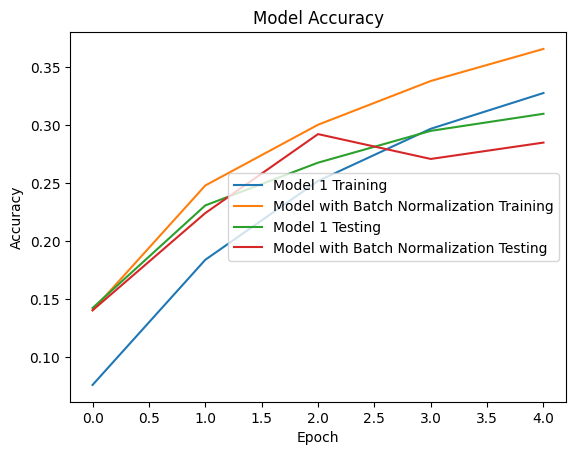

In [29]:
plt.plot(model_1_history.history['accuracy'])
plt.plot(model_2_history.history['accuracy'])
plt.plot(model_1_history.history['val_accuracy'])
plt.plot(model_2_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Model 1 Training','Model with Batch Normalization Training', 
            'Model 1 Testing', 'Model with Batch Normalization Testing'],
           loc='center right')

c Dropout

In [32]:
model_3 = Sequential()
model_3.add(Conv2D(32, (3,3), activation="relu"))
model_3.add(MaxPooling2D((2, 2)))
model_3.add(Conv2D(64, (3,3), activation="relu"))
model_3.add(MaxPooling2D((2, 2)))
model_3.add(Conv2D(64, (3,3), activation="relu"))
model_3.add(Flatten())
model_3.add(Dense(64))
model_3.add(Activation("relu"))
model_3.add(Dropout(0.5))
model_3.add(Dense(100))
model_3.add(Activation("softmax"))

model_3.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [33]:
model_3.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [34]:
model_3_history = model_3.fit(x_train, y_train,
                              batch_size=64,
                              epochs=15,
                              verbose=1,
                              validation_data=(x_test, y_test))

Epoch 1/15
782/782 [==============================] - 8s 7ms/step - loss: 4.3470 - accuracy: 0.0344 - val_loss: 3.9636 - val_accuracy: 0.0898
Epoch 2/15
782/782 [==============================] - 4s 6ms/step - loss: 3.9417 - accuracy: 0.0861 - val_loss: 3.6570 - val_accuracy: 0.1458
Epoch 3/15
782/782 [==============================] - 5s 7ms/step - loss: 3.7358 - accuracy: 0.1166 - val_loss: 3.4535 - val_accuracy: 0.1816
Epoch 4/15
782/782 [==============================] - 5s 6ms/step - loss: 3.6044 - accuracy: 0.1408 - val_loss: 3.2808 - val_accuracy: 0.2137
Epoch 5/15
782/782 [==============================] - 4s 6ms/step - loss: 3.4894 - accuracy: 0.1596 - val_loss: 3.1717 - val_accuracy: 0.2291
Epoch 6/15
782/782 [==============================] - 5s 7ms/step - loss: 3.4158 - accuracy: 0.1702 - val_loss: 3.0947 - val_accuracy: 0.2534
Epoch 7/15
782/782 [==============================] - 4s 6ms/step - loss: 3.3406 - accuracy: 0.1832 - val_loss: 3.0629 - val_accuracy: 0.2547
Epoch 

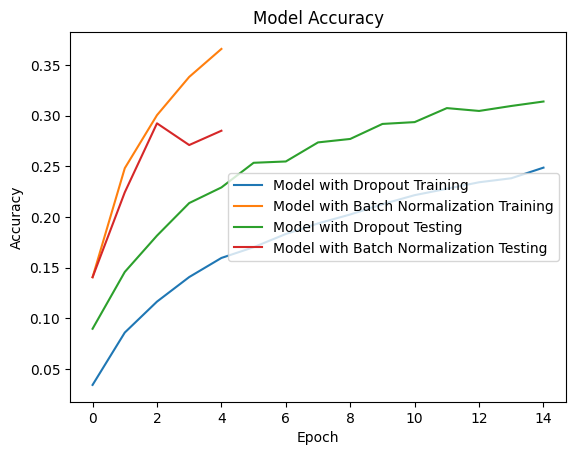

In [35]:
plt.plot(model_3_history.history['accuracy'])
plt.plot(model_2_history.history['accuracy'])
plt.plot(model_3_history.history['val_accuracy'])
plt.plot(model_2_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Model with Dropout Training','Model with Batch Normalization Training', 
            'Model with Dropout Testing', 'Model with Batch Normalization Testing'],
           loc='center right')

c batchNormalization b Dropout

In [36]:
import tensorflow as tf
from tensorflow import keras
from keras import layers

In [37]:
model_4 = tf.keras.models.Sequential([
    layers.Conv2D(16, (3, 3), activation='relu',
                  input_shape=(32, 32, 3), padding='same'),
    layers.Conv2D(32, (3, 3),
                  activation='relu',
                  padding='same'),
    layers.Conv2D(64, (3, 3),
                  activation='relu',
                  padding='same'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3),
                  activation='relu',
                  padding='same'),
  
  
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(100, activation='softmax')
])

In [38]:
model_4.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [39]:
model_4_history = model_3.fit(x_train, y_train,
                              batch_size=64,
                              epochs=15,
                              verbose=1,
                              validation_data=(x_test, y_test))

Epoch 1/15
782/782 [==============================] - 5s 6ms/step - loss: 2.9600 - accuracy: 0.2500 - val_loss: 2.7201 - val_accuracy: 0.3195
Epoch 2/15
782/782 [==============================] - 6s 7ms/step - loss: 2.9378 - accuracy: 0.2552 - val_loss: 2.7254 - val_accuracy: 0.3200
Epoch 3/15
782/782 [==============================] - 4s 6ms/step - loss: 2.9069 - accuracy: 0.2626 - val_loss: 2.7129 - val_accuracy: 0.3180
Epoch 4/15
782/782 [==============================] - 4s 6ms/step - loss: 2.8936 - accuracy: 0.2617 - val_loss: 2.6931 - val_accuracy: 0.3273
Epoch 5/15
782/782 [==============================] - 6s 7ms/step - loss: 2.8691 - accuracy: 0.2669 - val_loss: 2.6787 - val_accuracy: 0.3236
Epoch 6/15
782/782 [==============================] - 5s 7ms/step - loss: 2.8541 - accuracy: 0.2680 - val_loss: 2.6726 - val_accuracy: 0.3221
Epoch 7/15
782/782 [==============================] - 5s 6ms/step - loss: 2.8278 - accuracy: 0.2739 - val_loss: 2.6653 - val_accuracy: 0.3272
Epoch 

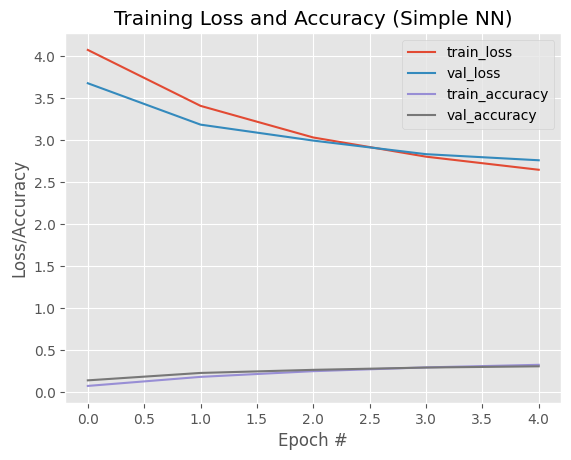

In [41]:
N = np.arange(0, 5)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, model_1_history.history["loss"], label="train_loss")
plt.plot(N, model_1_history.history["val_loss"], label="val_loss")
plt.plot(N, model_1_history.history["accuracy"], label="train_accuracy")
plt.plot(N, model_1_history.history["val_accuracy"], label="val_accuracy")
plt.title("Training Loss and Accuracy (Simple NN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

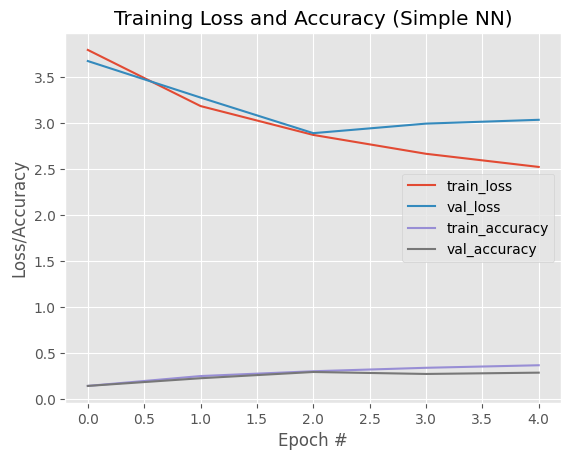

In [42]:
N = np.arange(0, 5)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, model_2_history.history["loss"], label="train_loss")
plt.plot(N, model_2_history.history["val_loss"], label="val_loss")
plt.plot(N, model_2_history.history["accuracy"], label="train_accuracy")
plt.plot(N, model_2_history.history["val_accuracy"], label="val_accuracy")
plt.title("Training Loss and Accuracy (Simple NN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

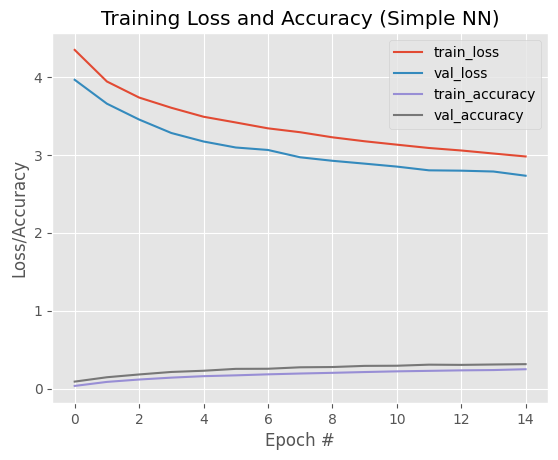

In [44]:
N = np.arange(0, 15)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, model_3_history.history["loss"], label="train_loss")
plt.plot(N, model_3_history.history["val_loss"], label="val_loss")
plt.plot(N, model_3_history.history["accuracy"], label="train_accuracy")
plt.plot(N, model_3_history.history["val_accuracy"], label="val_accuracy")
plt.title("Training Loss and Accuracy (Simple NN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

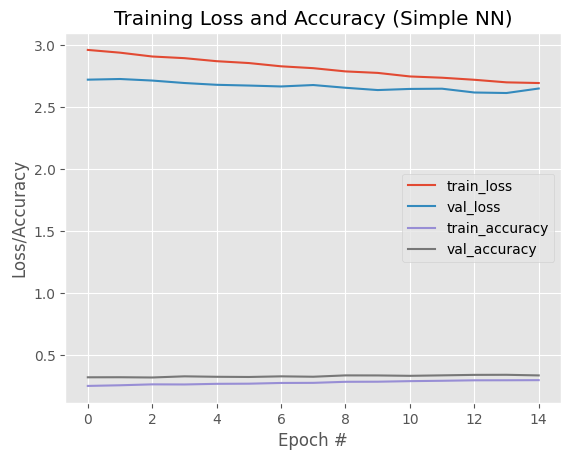

In [45]:
N = np.arange(0, 15)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, model_4_history.history["loss"], label="train_loss")
plt.plot(N, model_4_history.history["val_loss"], label="val_loss")
plt.plot(N, model_4_history.history["accuracy"], label="train_accuracy")
plt.plot(N, model_4_history.history["val_accuracy"], label="val_accuracy")
plt.title("Training Loss and Accuracy (Simple NN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()